In [37]:
import numpy as np
from TO_sim.gen_Distribution import *
from TO_sim.Kuramoto_model import *
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

# Sample of Lorentizan distribution

In [35]:
N = 100_000
theta , omega, Kc = Lorentzian(N,0,1)
print(f"Kc = {Kc}")

Kc = 2.0


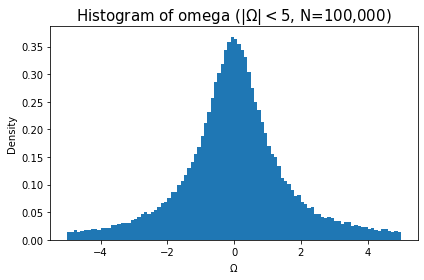

In [34]:
plt.hist(omega[np.where(np.abs(omega)<5)], bins = 100,density=True);
plt.title("Histogram of omega ($|\Omega|<5$, N=100,000)",fontsize=15)
plt.xlabel("$\Omega$")
plt.ylabel("Density")
plt.tight_layout()
# plt.savefig("Review/Histogram of g.png",dpi=400)

## Theta gif

In [ ]:
N = 1000
theta,omega,Kc = Lorentzian(N,0,1)

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap

In [18]:
theta_s,dtheta_s,rs,t = Sol_Kuramoto_mf(500,3,1,(0,100),distribution="Lorentzian")

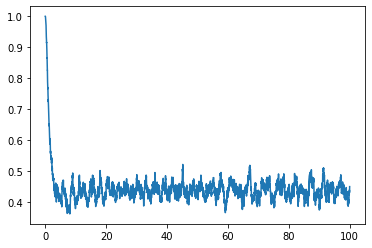

In [2]:
rs, t = Sol_r_Kuramoto_mf_C(3,500,1,(0,100),distribution="Lorentzian",seed=100)
plt.plot(t,rs)

In [95]:
rs = []
rsc = []
dk = 0.01
N, m = 5000,0
Ks = np.arange(1.5,3+dk,dk)
for S in parmap.map(Sol_r_Kuramoto_mf,Ks,N,m,(0,100),distribution = "Normal",seed=0,pm_pbar=True, pm_processes=16):
    r,t = S
    rs.append(r)
    
for S in parmap.map(Sol_r_Kuramoto_mf_C,Ks,N,m,(0,100),distribution = "Normal",pm_pbar=True,seed=0, pm_processes=16):
    r,t = S
    rsc.append(r)

  0%|          | 0/151 [00:00<?, ?it/s]

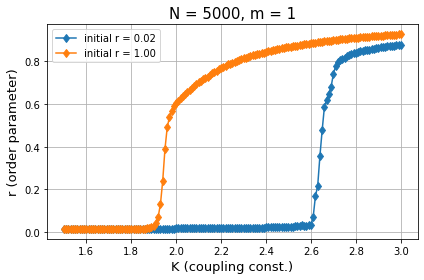

In [94]:
# plt.figure(figsize=(4.8,4.8))
plt.plot(Ks,np.mean(np.asarray(rs)[:,-5000:],axis=1),'-d',label =f"initial r = {rs[0][0]:.02f}")
plt.plot(Ks,np.mean(np.asarray(rsc)[:,-5000:],axis=1),'-d',label =f"initial r = {rsc[0][0]:.02f}")
plt.legend()
plt.title(f"N = {N}, m = {m}",fontsize=15)
plt.xlabel("K (coupling const.)",fontsize=13)
plt.ylabel("r (order parameter)",fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig(f"Review/N = {N},m = {m}, Normal dk = 0.01.png",dpi=400)

In [57]:
len(t)

10001

In [65]:
round(19.1/3,1)

6.4